# Imputación usando Machine Learning

En este ejemplo, vamos a ver como podemos usar modelos de Machine Learning, por ejemplo, la regresión lineal para hacer una mejor estimación de los datos faltantes!

**Saber más:** https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/

In [2]:
#### Paquetes

import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, r2_score

import warnings
warnings.filterwarnings("ignore")

#### Imputación simple

In [2]:
df = pd.read_csv("../data/2008_small.zip",nrows = 1000000)

X = df[['AirTime','Distance','TaxiIn','TaxiOut',"DepDelay","ArrDelay","CarrierDelay"]] 
X

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay,CarrierDelay
0,69.0,431,16.0,78.0,-3.0,60.0,0.0
1,246.0,1848,7.0,9.0,17.0,14.0,NaN
2,89.0,641,7.0,11.0,0.0,-8.0,NaN
3,219.0,1557,8.0,27.0,-4.0,-2.0,NaN
4,64.0,412,5.0,12.0,-5.0,-9.0,NaN
...,...,...,...,...,...,...,...
999995,63.0,377,14.0,8.0,-2.0,-10.0,NaN
999996,57.0,312,6.0,24.0,-3.0,10.0,NaN
999997,134.0,984,8.0,10.0,-4.0,-17.0,NaN
999998,75.0,453,5.0,12.0,-7.0,-15.0,NaN


In [3]:
X.isna().sum()

AirTime          21945
Distance             0
TaxiIn           21509
TaxiOut          19428
DepDelay         19323
ArrDelay         21945
CarrierDelay    782608
dtype: int64

In [4]:
X.mean()

AirTime         104.001648
Distance        726.152046
TaxiIn            6.860292
TaxiOut          16.437527
DepDelay          9.977095
ArrDelay          8.164608
CarrierDelay     15.815577
dtype: float64

In [5]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp.fit(X)       

In [10]:
X = imp.fit_transform(X)

In [11]:
X

array([[  69.        ,  431.        ,   16.        , ...,   -3.        ,
          60.        ,    0.        ],
       [ 246.        , 1848.        ,    7.        , ...,   17.        ,
          14.        ,   15.81557739],
       [  89.        ,  641.        ,    7.        , ...,    0.        ,
          -8.        ,   15.81557739],
       ...,
       [ 134.        ,  984.        ,    8.        , ...,   -4.        ,
         -17.        ,   15.81557739],
       [  75.        ,  453.        ,    5.        , ...,   -7.        ,
         -15.        ,   15.81557739],
       [ 184.        , 1399.        ,   37.        , ...,    2.        ,
          43.        ,    0.        ]])

In [7]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,104.001648,726.152046,6.860292,16.437527,9.977095,8.164608,15.815577
std,66.735142,562.204505,4.880676,11.293259,35.034861,38.165629,18.694623
min,0.000000,28.000000,0.000000,0.000000,-79.000000,-86.000000,0.000000
25%,56.000000,325.000000,4.000000,10.000000,-4.000000,-10.000000,15.815577
50%,87.000000,580.000000,6.000000,14.000000,-1.000000,-2.000000,15.815577
75%,131.000000,954.000000,8.000000,19.000000,9.000000,11.000000,15.815577
max,823.000000,4962.000000,240.000000,429.000000,1348.000000,1350.000000,1348.000000


>Una aproximación más sólida basada en las relaciones presentes en los datos...

In [12]:
X = df[['AirTime','Distance','TaxiIn','TaxiOut',"DepDelay","ArrDelay","CarrierDelay"]] 
X.corr()

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay,CarrierDelay
AirTime,1.000000,0.982921,0.086045,0.106584,0.027114,0.034220,-0.011799
Distance,0.982921,1.000000,0.077996,0.090476,0.025593,0.006216,0.006705
TaxiIn,0.086045,0.077996,1.000000,0.039163,0.022978,0.121193,-0.049934
TaxiOut,0.106584,0.090476,0.039163,1.000000,0.101967,0.324712,-0.070147
DepDelay,0.027114,0.025593,0.022978,0.101967,1.000000,0.931193,0.546172
ArrDelay,0.034220,0.006216,0.121193,0.324712,0.931193,1.000000,0.516055
CarrierDelay,-0.011799,0.006705,-0.049934,-0.070147,0.546172,0.516055,1.000000


In [13]:
X = X.dropna(subset=["DepDelay","ArrDelay","TaxiOut"])
newX = X[["DepDelay","ArrDelay","TaxiOut","CarrierDelay"]] 
#Aquí no hay Nans en las 3 columnas explicativas, y sí los hay en CarrierDelay

train = newX[np.isnan(X.CarrierDelay)==False] #No hay Nans
train

,DepDelay,ArrDelay,TaxiOut,CarrierDelay
0,-3.0,60.0,78.0,0.0
6,41.0,28.0,9.0,0.0
11,54.0,64.0,15.0,0.0
21,-4.0,27.0,40.0,0.0
22,5.0,36.0,14.0,5.0
...,...,...,...,...
999987,40.0,40.0,15.0,8.0
999990,29.0,40.0,38.0,0.0
999992,11.0,27.0,15.0,11.0
999994,42.0,34.0,8.0,0.0


In [14]:
regr = linear_model.LinearRegression()
regr.fit(train[["DepDelay","ArrDelay","TaxiOut"]], train["CarrierDelay"])

LinearRegression()

In [15]:
regr.intercept_

-1.363336039238133

In [16]:
regr.coef_

array([ 0.28727669,  0.08765743, -0.0767194 ])

In [17]:
r2_score( train["CarrierDelay"],regr.predict(train[["DepDelay","ArrDelay","TaxiOut"]])  )

0.2992607278363949

>Los datos con los que ha aprendido el modelo

In [18]:
train

,DepDelay,ArrDelay,TaxiOut,CarrierDelay
0,-3.0,60.0,78.0,0.0
6,41.0,28.0,9.0,0.0
11,54.0,64.0,15.0,0.0
21,-4.0,27.0,40.0,0.0
22,5.0,36.0,14.0,5.0
...,...,...,...,...
999987,40.0,40.0,15.0,8.0
999990,29.0,40.0,38.0,0.0
999992,11.0,27.0,15.0,11.0
999994,42.0,34.0,8.0,0.0


In [19]:
test = newX[np.isnan(X.CarrierDelay) == True]
test_X = test[["DepDelay","ArrDelay","TaxiOut"]] # Solo las columnas X

>Los datos que vamos a usar para imputar el valor de CarrierDelay

In [20]:
test

,DepDelay,ArrDelay,TaxiOut,CarrierDelay
1,17.0,14.0,9.0,NaN
2,0.0,-8.0,11.0,NaN
3,-4.0,-2.0,27.0,NaN
4,-5.0,-9.0,12.0,NaN
5,-2.0,-5.0,11.0,NaN
...,...,...,...,...
999993,3.0,10.0,16.0,NaN
999995,-2.0,-10.0,8.0,NaN
999996,-3.0,10.0,24.0,NaN
999997,-4.0,-17.0,10.0,NaN


In [21]:
imputacion = regr.predict(test_X)
imputacion

array([ 4.05709723, -2.90850887, -4.7591814 , ..., -3.18985732,
       -4.76981315, -5.60976716])

In [22]:
np.mean(imputacion)

-3.304334663595517

>Sobreescribimos los datos imputados en el objeto original

In [23]:
X.loc[np.isnan(X.CarrierDelay),"CarrierDelay"] = imputacion

In [24]:
X.CarrierDelay[X.CarrierDelay < 0] = 0

In [25]:
X

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay,CarrierDelay
0,69.0,431,16.0,78.0,-3.0,60.0,0.000000
1,246.0,1848,7.0,9.0,17.0,14.0,4.057097
2,89.0,641,7.0,11.0,0.0,-8.0,0.000000
3,219.0,1557,8.0,27.0,-4.0,-2.0,0.000000
4,64.0,412,5.0,12.0,-5.0,-9.0,0.000000
...,...,...,...,...,...,...,...
999995,63.0,377,14.0,8.0,-2.0,-10.0,0.000000
999996,57.0,312,6.0,24.0,-3.0,10.0,0.000000
999997,134.0,984,8.0,10.0,-4.0,-17.0,0.000000
999998,75.0,453,5.0,12.0,-7.0,-15.0,0.000000


# Reducción de Dimensionalidad. PCA

Principal Component Analysis, basado en la reestructuración de las variables (columnas) para agrupar más porcentaje de varianza.

"PCA = Reducir dimensiones, Preservar información"

**Saber más:** https://medium.com/all-about-ml/understanding-principal-component-analysis-pca-556778324b0e

In [26]:
df = pd.read_csv("../data/2008_small.zip",nrows = 1000000)

df = df.dropna(subset = ['AirTime','Distance','TaxiIn','TaxiOut',"DepDelay","ArrDelay"])
df = df.sample(frac=1).head(1000)

X = df[['AirTime','Distance','TaxiIn','TaxiOut',"DepDelay","ArrDelay"]] 
columnas = X.columns

In [27]:
X

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay
37668,53.0,125,5.0,8.0,3.0,12.0
465528,106.0,733,8.0,16.0,90.0,66.0
971646,66.0,391,12.0,20.0,-3.0,5.0
313934,110.0,761,12.0,15.0,-1.0,-10.0
930983,207.0,1476,13.0,19.0,-4.0,-5.0
...,...,...,...,...,...,...
14704,227.0,1891,7.0,10.0,-4.0,-12.0
372082,56.0,387,4.0,21.0,6.0,5.0
904706,84.0,590,7.0,12.0,-1.0,-13.0
617029,94.0,626,9.0,11.0,16.0,0.0


In [32]:
scaler = StandardScaler()   ## IMPORTANTISIMO ##
scaler.fit(X)

X = scaler.transform(X)

pca = PCA(n_components=2) # El numero de componentes son la cantidad de nuevas columnas que quiero
pca.fit(X)

PCA(n_components=2)

In [36]:
pca.components_

array([[ 0.44350555,  0.42902949,  0.09985508,  0.32052273,  0.4871946 ,
         0.51881798],
       [-0.53699316, -0.54951947, -0.00725569,  0.06826668,  0.44702871,
         0.4529007 ]])

In [33]:
columnas

Index(['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay'], dtype='object')

In [34]:
X

array([[-7.38566326e-01, -1.05516252e+00, -3.52850882e-01,
        -7.65282267e-01, -2.06242734e-01,  1.32373992e-01],
       [ 1.82785170e-02, -2.15105303e-03,  3.25708506e-01,
        -2.09347733e-02,  2.39534025e+00,  1.60108070e+00],
       [-5.52925138e-01, -5.94470002e-01,  1.23045436e+00,
         3.51238974e-01, -3.85662251e-01, -5.80139151e-02],
       ...,
       [-2.95883493e-01, -2.49816579e-01,  9.95220436e-02,
        -3.93108520e-01, -3.25855745e-01, -5.47582819e-01],
       [-1.53082579e-01, -1.87467216e-01,  5.51894969e-01,
        -4.86151957e-01,  1.82499551e-01, -1.94005277e-01],
       [-2.67323310e-01, -1.80539508e-01, -8.05223808e-01,
        -3.93108520e-01, -3.55758998e-01, -6.29177636e-01]])

In [35]:
print(np.round(pca.components_,2)) # nuevas columnas x viejas columnas

[[ 0.44  0.43  0.1   0.32  0.49  0.52]
 [-0.54 -0.55 -0.01  0.07  0.45  0.45]]


In [37]:
columnas

Index(['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay'], dtype='object')

In [38]:
pd.DataFrame(np.round(pca.components_,2),columns=columnas)

# 1a componente, vuelos largos y retrasos altos (vuelos cortos, retrasos bajos)
# 2a componente, vuelos cortos y retrasos altos (vuelos largos, retrasos bajos)

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay
0,0.44,0.43,0.10,0.32,0.49,0.52
1,-0.54,-0.55,-0.01,0.07,0.45,0.45


>La interpretación de los datos se relaciona de manera directa con las columnas originales

In [39]:
print(pca.explained_variance_ratio_)

[0.35413479 0.32466618]


In [40]:
nuevosvalores = pca.transform(X)
nuevosvalores

array([[-1.09258075,  0.89451017],
       [ 2.03066363,  1.78349066],
       [-0.48281456,  0.43996333],
       ...,
       [-0.79731805, -0.12505934],
       [-0.2607758 ,  0.14174624],
       [-0.90217458, -0.22222247]])

>Visualizar la transformación del espacio

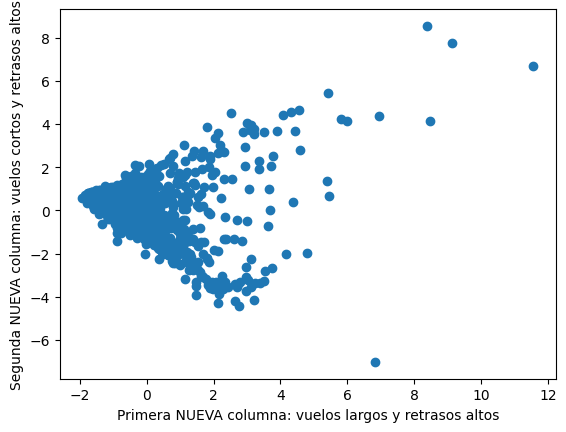

In [41]:
plt.scatter(nuevosvalores[:,0],nuevosvalores[:,1],)
plt.xlabel("Primera NUEVA columna: vuelos largos y retrasos altos")
plt.ylabel("Segunda NUEVA columna: vuelos cortos y retrasos altos")
plt.show()

## Ejercicios. Imputación y PCA


1. Ejecuta el siguiente código para generarte unos datos de ejemplo con NAs

In [ ]:
from pydataset import data

iris = data('iris')
iris["Petal.Length"][np.random.uniform(0, 1, size=iris.shape[0]) >.8]= np.nan
posicionesna = np.isnan(iris["Petal.Length"])
iris.head()

2. Utilizando las técnicas que hemos visto hasta ahora, prueba de imputar los datos faltantes usando la media o la mediana

3. Usando las demás columnas que consideres relevantes, imputa los valores faltantes mediante un modelo de regresión lineal

4. Visualiza los datos iris completos usando PCA (convirtiendo 4 columnas en 2).

5. Usando Kmeans, el clustering jerárquico o cualquier otro algoritmo de agrupación, visualiza los resultados de agrupar el dataframe iris, con los dos primeros componentes principales

6. (Extra) Ajustar un modelo de regresión/clasificación para predecir alguna variable, usando nuevas columnas PCA como variables predictoras

# Support Vector Machine

Los SVM son algoritmos de clasificación y regresión que representan transformaciones de los datos más flexibles que las relaciones lineales.

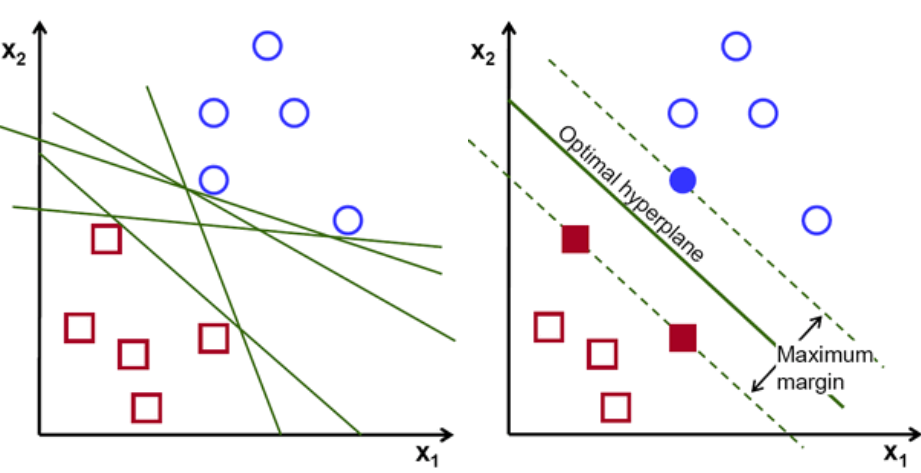

#### Ejemplo Sencillo

In [42]:
df = pd.read_csv("../data/2008_small.zip",nrows = 10000)

df = df.dropna(subset =['AirTime','Distance','TaxiIn','TaxiOut'])
df = df.sample(frac=1).head(2000)

X = df[['AirTime','Distance','TaxiIn','TaxiOut']] 
Y = df['ArrDelay'] > np.median(df["ArrDelay"])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [43]:
np.mean(Y)

0.49

In [44]:
# Si se queda infinitamente atrapado, tenemos que rearrancar, pero con parámetros de parada.
# max_iter // tol // cache

svc = svm.SVC(C = 0.1,kernel = 'linear', tol = 1e-2)
svc.fit(X_train, y_train)
np.mean( svc.predict(X_test) == y_test)

0.6775

#### Parámetros de un SVM:
    
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 
- C: Parámetro de complejidad
- kernel (transformación de los datos) {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

## Automatic parameter Tuning / Model estimation

Not working really fast :'(

In [ ]:
parameters = {'kernel':('linear', 'poly'), 'C':[1,5]}
# parameters = {'kernel':('linear','rbf','poly','sigmoid'), 'C':[0.001,0.01,0.05,0.1,0.5]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,verbose=3,n_jobs=-1)
clf.fit(X, Y)

print("DONE")

Fitting 5 folds for each of 4 candidates, totalling 20 fits


¿Qué es la Búsqueda de cuadrícula con Cross Validation?

In [ ]:
clf.cv_results_

>Nos permite dar una **primera intuición de los parámetros que funcionan mejor**

In [ ]:
clf.best_params_

In [ ]:
clf.cv_results_['mean_test_score']

In [ ]:
clf.best_score_

# Neural Networks

Una explicación visual de las redes neuronales

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.44747&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

En resumen, se trata de un modelo clasificador/regresor que busca detectar patrones mediante la combinación de transformaciones de los datos, las llamadas "neuronas".

**Saber más:** https://towardsdatascience.com/first-neural-network-for-beginners-explained-with-code-4cfd37e06eaf

In [3]:
df = pd.read_csv("../data/2008_small.zip",nrows = 1000000)

df = df.dropna(subset =['AirTime','Distance','TaxiIn','TaxiOut'])
df = df.sample(frac=1).head(10000)

X = df[['AirTime','Distance','TaxiIn','TaxiOut']] 
Y = df['ArrDelay']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X = pd.DataFrame(X_poly, columns = poly.get_feature_names(input_features=X.columns))


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=1)

scaler = StandardScaler()  
scaler.fit(X_train) # conocimiento

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
regr = MLPRegressor(solver='lbfgs', alpha=1, hidden_layer_sizes=(10,100,10)) #The ith element represents the number of neurons in the ith hidden layer.

model = regr.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R cuadrado: ",r2_score(y_test, predictions))

R cuadrado:  0.10483760732527769


>Comparamos con el modelo de regresión lineal

In [7]:
regrLin = linear_model.LinearRegression()
regrLin.fit(X_train,y_train)
y_pred = regrLin.predict(X_test)
print("R cuadrado: ",r2_score(y_test, y_pred))

R cuadrado:  0.14593380299733616


>Algunos de los parámetros con los que podemos jugar en los modelos de red neurnal son:
>   
>- solver: {‘lbfgs’, ‘sgd’, ‘adam’}    
>- activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
>- alpha : float, optional, default 0.0001 L2 penalty
>- learning_rate : {‘constant’, ‘invscaling’, ‘adaptive’}

>Considerar la cantidad de combinaciones posibles de parámetros...\
>https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

### Selección de parámetros automatizada (sin funciones)

Más potente, más flexible, más control... pero requiere más código...

In [ ]:
# Modelo con 3 capas

alphas = [0.0000001,0.001,0.1]
layers = [2,5,10,20]
solvers = ["lbfgs","adam","sgd"]
listtodf = []
i = 0
print("Iterations:", len(alphas)*len(layers) ** 3 *len(solvers))

for alpha in alphas:
    for layer1 in layers: 
        for layer2 in layers:
            for layer3 in layers:
                for solver in solvers:
                    i += 1 # i = i + 1 // i++
                    regr = MLPRegressor(solver=solver, alpha=alpha, hidden_layer_sizes=(layer1,layer2,layer3),warm_start=True)
                    model = regr.fit(X_train, y_train)
                    predictions = model.predict(X_test)
                    print(i, 
                          "R cuadrado: ",round(r2_score(y_test, predictions),2), 
                          " Solver: ",solver, 
                          " Layer size: ", (layer1,layer2,layer3),
                          " Alpha: ",alpha)
                    listtodf.append([alpha,(layer1,layer2,layer3),solver,r2_score(y_test, predictions)])

In [ ]:
listtodf

>Obteniendo conclusiones sobre los datos

In [ ]:
parameters = pd.DataFrame(listtodf, columns =['Alphas', 'Layers','Solvers','R2']) 
parameters.to_csv("parameters.csv")

In [ ]:
parameters = pd.read_csv("parameters.csv",index_col = 0)
parameters

In [ ]:
parameters.groupby("Alphas").mean()["R2"].sort_values(ascending = False)

In [ ]:
parameters.groupby("Layers").mean()["R2"].sort_values(ascending = False)

In [ ]:
parameters.groupby("Solvers").mean()["R2"].sort_values(ascending = False)

In [ ]:
parameters[parameters.R2 == max(parameters.R2)]

## Ejercicio

Intenta clasificar/predecir lo mejor que puedas los datos de iris o algún dataset sencillo, usando uno de los dos modelos que hemos visto (SVM y NN). Puedes usar una de las columnas numéricas como respuesta (regresión) o la columa "species" (clasificación).

Aprovecha para añadir nuevas variables (feature engineering), seleccionar alguno de los parámetros que funcionan mejor con estos datos, etc.

© Netmind S.L.

Todos los derechos reservados. Este documento (v1.00) ha sido diseñado para el uso exclusivo del cliente que atiende a esta formación.

Ninguna parte de este documento puede ser reproducida, distribuida o transmitida en cualquier forma o por cualquier medio sin el permiso previo por escrito de Netmind.